In [19]:
import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
import numpy as np

COLORS = ('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
        '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
        '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5')

font_paths = ('CMU Serif/cmunbi.ttf', 'CMU Serif/cmunbl.ttf', 'CMU Serif/cmunbx.ttf', 'CMU Serif/cmunci.ttf', 
             'CMU Serif/cmunrm.ttf', 'CMU Serif/cmunsl.ttf', 'CMU Serif/cmunti.ttf', 'CMU Serif/cmunui.ttf')

for font_path in font_paths:
    fm.fontManager.addfont(font_path)

plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['CMU Serif']
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('axes', unicode_minus=False)

In [13]:
def diff2(x_0, h, f):
    return (f(x_0 + h) - f(x_0 - h))/(2 * h)

In [41]:
def g1(x):
    return x * np.e**x

def g2(x):
    return x**2 * np.sin(3 * x)
        
def g3(x):
    return np.sin(np.pi / x)

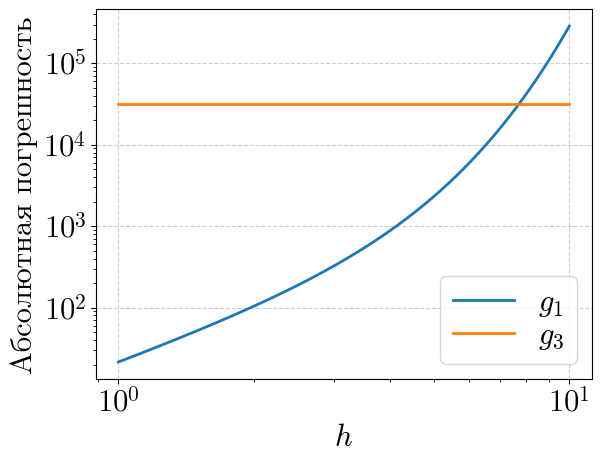

In [39]:
G1_DIFF_REF = 80.34215
G3_DIFF_REF = -31415.92654

h_set = np.logspace(10**-16, 1, 1000)

g1_abs_err = np.abs(np.array([diff2(3, h, g1) for h in h_set]) - G1_DIFF_REF)
g3_abs_err = np.abs(np.array([diff2(0.01, h, g3) for h in h_set]) - G3_DIFF_REF)


fig, ax = plt.subplots()

ax.set_prop_cycle(color=COLORS)
ax.minorticks_on()
ax.grid(True, linestyle='--', alpha=0.6)

ax.loglog(h_set, g1_abs_err, linewidth=2.0, label='$g_1$')
ax.loglog(h_set, g3_abs_err, linewidth=2.0, label='$g_3$')
ax.set_xlabel('$h$')
ax.set_ylabel('Абсолютная погрешность')
ax.legend(labelspacing=0.1)


plt.show()